In [2]:
#In this part of the program are the most important functions that we are going to need.
#Please run this cell before any other, in order to achieve the availability of the functions.

import numpy as np
import pandas

def read_data(filename):
    df=pandas.read_csv("./rawData/"+str(filename)) #loading the file
    t_start = np.array(df["Start"])[0].astype(float) #time of starting the experiment
    t_step = np.array(df["Increment"])[0].astype(float) #timesteps (to be multiplied with the first column)
    element=np.array(df["X"])[1:].astype(float) #simply an element of a measure sequence
    ch1=np.array(df["CH1"])[1:].astype(float) #data of ch1 in V
    ch2=np.array(df["CH2"])[1:].astype(float) #data of ch2 in V

    return ch1, ch2, t_start, t_step, element


The filenames of the files with raw data, that is going to be needed in the excercises is listed here
FET Kennlinie(4.1):
    NewFile13v.csv for 3V
    NewFile16v.csv for 6V
    NewFile10v.csv for 10V

Charakterisierung OPV(4.2):
    invertierender Verstärker:
        NewFile10kinv.csv for 10kohm, with U_E=1V
        NewFile100kinv.csv for 100kohm, with U_E=1V
        NewFile100kinv500.csv for 100kohm, 0.5V
        NewFile100kiv250.csv for 100kohm, 0.25V

    Nicht-invertierter Verstärker(Sinus):
        NewFile1ninv250.csv, with U_E=0.25
        NewFile1ninv500.csv, 0.5
        NewFile1ninv1000.csv, 0.5

    Integrierer:
        NewFile1c250s.csv sinus 0.25V
        NewFile1c500s.csv sinus 0.5V
        NewFile1c1s.csv sinus 1V
        NewFile1c75r.csv rechteck 0.075V
        NewFile1c5r.csv rechteck 0.05V
        NewFile1c1r.csv rechteck 0.1V
        

Data analysis of EX 1 FET:
plot X/Y of CH1/CH2 for 3V, 6V, 10V

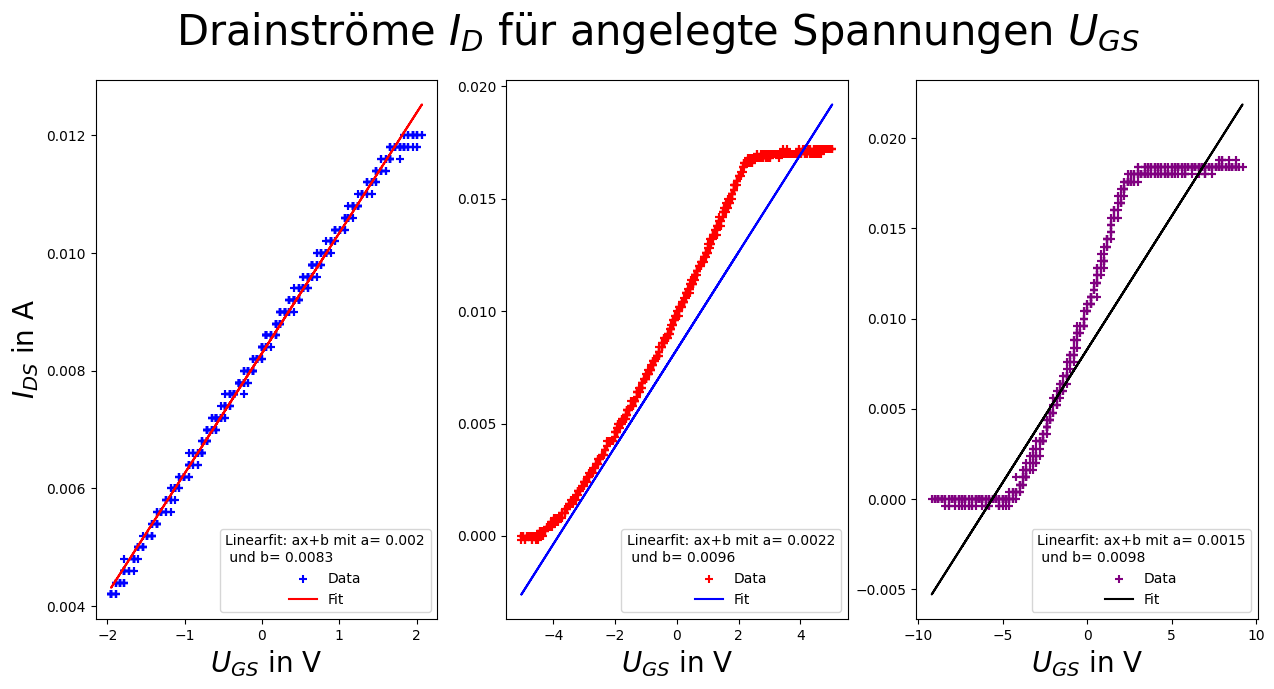

Maximum Voltage by 3V: 0.00970810810810811 +- 0.001730719649168383
Maximum Voltage by 6V: 0.016857943925233643 +- 0.0010092175455040408
Maximum Voltage by 10V: 0.018173584905660376 +- 0.0010519076231121295
-4.0616991881583004 und 0.007063504049927381
-4.4285836011783655 und 0.024650177509951313
-6.631024662730322 und 0.06132673732433945


In [2]:
filename1="NewFile13v.csv"
filename2="NewFile16v.csv"
filename3="NewFile10v.csv"

(ch1_1, ch2_1, t_start_1, t_step_1, element_1)=read_data(filename1)
(ch1_2, ch2_2, t_start_2, t_step_2, element_2)=read_data(filename2)
(ch1_3, ch2_3, t_start_3, t_step_3, element_3)=read_data(filename3)

import matplotlib.pyplot as plt
from scipy import stats
fig, axs=plt.subplots(1, 3, figsize=(15, 7)) #defining figure object



def myfunction(x, slope, intercept):
  return slope * x + intercept

#U_GS=+-2V
axs[0].scatter(ch1_1, ch2_1/100, color="blue", marker="+", label="Data") #division with R=100 because we want the current
axs[0].set_ylabel(r"$I_{DS}$ in A", fontsize=20)
axs[0].set_xlabel(r"$U_{GS}$ in V", fontsize=20)
#fit if necessary _____________________________________________
slope1, intercept1, r1, p1, std_err1= stats.linregress(ch1_1, ch2_1/100)
mymodel = list(map(myfunction, ch1_1, slope1*np.ones(len(ch1_1)), intercept1*np.ones(len(ch1_1))))
axs[0].plot(ch1_1, mymodel, color="red", label="Fit")
zero1=-intercept1/slope1
intercept_stderr1=0
zero1Uncert=np.sqrt((intercept_stderr1/slope1)**2 + (std_err1*intercept1/slope1**2)**2)
axs[0].legend(title="Linearfit: ax+b mit a= " + str(slope1.round(4)) + "\n und b= " + str(intercept1.round(4)), loc="lower right")
#fit if necessary _____________________________________________

#U_GS=+-5V
axs[1].scatter(ch1_2, ch2_2/100, color="red", marker="+", label="Data") #division with R=100 because we want the current
#axs[1].set_ylabel(r"$I_{DS}$ in A")
axs[1].set_xlabel(r"$U_{GS}$ in V", fontsize=20)
#fit if necessary _____________________________________________
slope2, intercept2, r2, p2, std_err2 = stats.linregress(ch1_2, ch2_2/100)
mymodel = list(map(myfunction, ch1_2, slope2*np.ones(len(ch1_2)), intercept1*np.ones(len(ch1_2)))) #[450:750]
axs[1].plot(ch1_2, mymodel, color="blue", label="Fit")
zero2=-intercept2/slope2
intercept_stderr2=0
zero2Uncert=np.sqrt((intercept_stderr2/slope2)**2 + (std_err2*intercept2/slope2**2)**2)
axs[1].legend(title="Linearfit: ax+b mit a= " + str(slope2.round(4)) + "\n und b= " + str(intercept2.round(4)), loc="lower right")
#fit if necessary _____________________________________________


#U_GS=+-9V
axs[2].scatter(ch1_3, ch2_3/100, color="purple", marker="+", label="Data") #division with R=100 because we want the current
#axs[2].set_ylabel(r"$I_{DS}$ in A")
axs[2].set_xlabel(r"$U_{GS}$ in V", fontsize=20)

#fit if necessary _____________________________________________
slope3, intercept3, r3, p3, std_err3 = stats.linregress(ch1_3, ch2_3/100)
mymodel = list(map(myfunction, ch1_3, slope3*np.ones(len(ch1_3)), intercept1*np.ones(len(ch1_3)))) #[550:650]
axs[2].plot(ch1_3, mymodel, color="black", label="Fit")
zero3=-intercept3/slope3
intercept_stderr3=0
zero3Uncert=np.sqrt((intercept_stderr3/slope3)**2 + (std_err3*intercept3/slope3**2)**2)
axs[2].legend(title="Linearfit: ax+b mit a= " + str(slope3.round(4)) + "\n und b= " + str(intercept3.round(4)), loc="lower right")
#fit if necessary _____________________________________________

fig.suptitle(r"Drainströme $I_D$ für angelegte Spannungen $U_{GS}$", fontsize=30)

plt.show()

#Calculating the maximal current with standard deviation as uncertainty
index=np.array(np.where(ch2_1==ch2_1.max()))
index1=index[0, 0]
volt1max=(ch2_1[index1:]).mean()
volt1maxUncert=np.std(ch2_1[index1:])

index=np.array(np.where(ch2_2==ch2_2.max())) #there seems to be a rush fall of the values that has'nt been plotted
index21=index[0, 0]
index=np.array(np.where(ch2_2[index21:]<0.85*ch2_2.max()))
index22=index21+index[0, 0]
volt2max=(ch2_2[index21:index22]).mean()
volt2maxUncert=np.std(ch2_2[index21:index22])

index=np.array(np.where(ch2_3==ch2_3.max()))
index31=index[0, 0]
index=np.array(np.where(ch2_3[index31:]<0.85*ch2_3.max()))
index32=index31+index[0, 0]
volt3max=(ch2_3[index31:index32]).mean()
volt3maxUncert=np.std(ch2_3[index31:index32])

current1max=volt1max/100
current1maxUncert=np.sqrt((volt1maxUncert/100)**2+(volt1max*5/100**2)**2) # 5 Ohm uncertainty for Resistance
current2max=volt2max/100
current2maxUncert=np.sqrt((volt2maxUncert/100)**2+(volt2max*5/100**2)**2)
current3max=volt3max/100
current3maxUncert=np.sqrt((volt3maxUncert/100)**2+(volt3max*5/100**2)**2)

print("Maximum Voltage by 3V: " + str(current1max) + " +- " + str(current1maxUncert))
print("Maximum Voltage by 6V: " + str(current2max) + " +- " + str(current2maxUncert))
print("Maximum Voltage by 10V: " + str(current3max) + " +- " + str(current3maxUncert))
print(str(zero1) + " und " + str(zero1Uncert))
print(str(zero2) + " und " + str(zero2Uncert))
print(str(zero3) + " und " + str(zero3Uncert))


Data analysis of EX 2 OPV:  
find increase value A from data and compare with theory

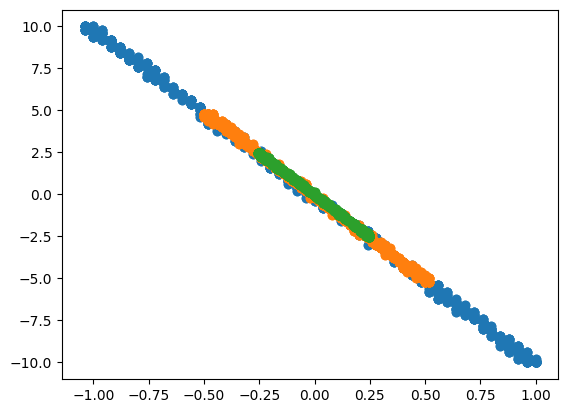

Reinforcement Factor: -9.832625623330529 +- 1.8280958715661524


In [3]:
#THIS PART IS BEEING DONE BY KEMAL MAN BUT ANDRIJA DID EVERYTHING
#INVERTIERENDER VERSTÄRKER
#Messungsnummer(look in Laborbuch) as index

#Sinus Form with U_E=1V, 10*R_1=R_2=100
import matplotlib.pyplot as plt
import numpy as np
(ch1, ch2, t_start, t_step, element)=read_data("NewFile100kinv.csv")
#temporary variable, calculates the Reinforcement factor, taken care of divide by zero
reinffactor1=np.divide(ch2, ch1, out=np.zeros_like(ch2), where=ch1!=0)
plt.scatter(ch1, ch2)


#Sinus Form with U_E=0.5V, 10*R_1=R_2=100
(ch1, ch2, t_start, t_step, element)=read_data("NewFile100kinv500.csv")
#temporary variable, calculates the Reinforcement factor, taken care of divide by zero
reinffactor2=np.divide(ch2, ch1, out=np.zeros_like(ch2), where=ch1!=0)
plt.scatter(ch1, ch2)

#Sinus Form with U_E=0.25V, 10*R_1=R_2=100
(ch1, ch2, t_start, t_step, element)=read_data("NewFile100kiv250.csv")
#temporary variable, calculates the Reinforcement factor, taken care of divide by zero
reinffactor3=np.divide(ch2, ch1, out=np.zeros_like(ch2), where=ch1!=0)
plt.scatter(ch1, ch2)
plt.show()
FinalFactor=np.concatenate((reinffactor1, reinffactor2, reinffactor3), axis=None)
print("Reinforcement Factor: " + str(FinalFactor.mean()) + " +- " + str(np.std(FinalFactor))) #negative reinforcement factor

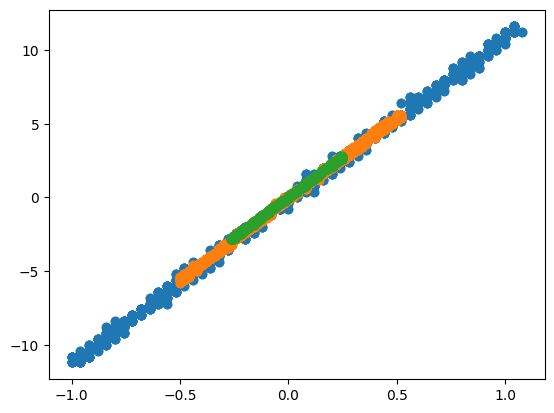

Reinforcement Factor: 10.893999006117419 +- 1.9642308172008145


In [9]:
#NICHT-INVERTIERENDER VERSTAERKER
import matplotlib.pyplot as plt
import numpy as np
#Sinus Form with U_E=1V, 10*R_1=R_2=100
(ch1, ch2, t_start, t_step, element)=read_data("NewFile1ninv1000.csv")
#temporary variable, calculates the Reinforcement factor, taken care of divide by zero
reinffactor3=np.divide(ch2, ch1, out=np.zeros_like(ch2), where=ch1!=0)
plt.scatter(ch1, ch2)

#Sinus Form with U_E=0.5V, 10*R_1=R_2=100
(ch1, ch2, t_start, t_step, element)=read_data("NewFile1ninv500.csv")
#temporary variable, calculates the Reinforcement factor, taken care of divide by zero
reinffactor2=np.divide(ch2, ch1, out=np.zeros_like(ch2), where=ch1!=0)
plt.scatter(ch1, ch2)

#Sinus Form with U_E=0.25V, 10*R_1=R_2=100
(ch1, ch2, t_start, t_step, element)=read_data("NewFile1ninv250.csv")
#temporary variable, calculates the Reinforcement factor, taken care of divide by zero
reinffactor1=np.divide(ch2, ch1, out=np.zeros_like(ch2), where=ch1!=0)
plt.scatter(ch1, ch2)

plt.show()
FinalFactor=np.concatenate((reinffactor1, reinffactor2, reinffactor3), axis=None)
print("Reinforcement Factor: " + str(abs(FinalFactor.mean())) + " +- " + str(np.std(FinalFactor)))

Data analysis of EX 3 low-pass:  
find cutoff frequency and plot fit for the low pass  
12 datapoints for 20Hz, 50Hz, 100Hz, 200Hz, ... file names 'NewFile1(frequency)hz.csv'

fit reslut: [3.56854006e-09] 8.554227848693308e-11


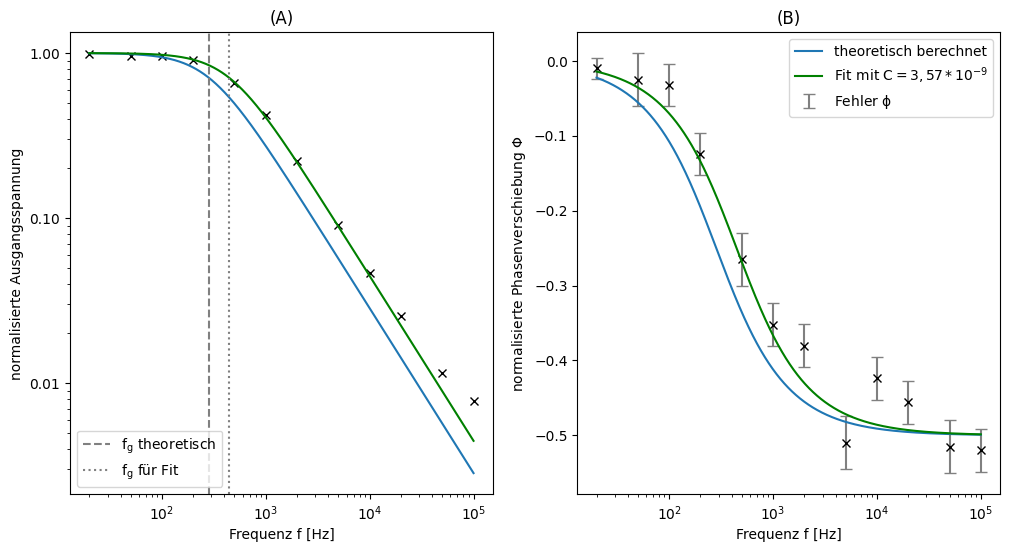

In [25]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
#values of used components
R1 = 10000 #Ohm
R2 = 100000 #Ohm
C = 5.6*10**(-9) #Farad
V_in = 1 #Volt

#function to find the difference in amplitude and phase of a wave current from before and after the low-pass
def ampandphasediff(frequency):
    #read data
    filename = 'NewFile1' + str(frequency) + 'hz.csv'
    (ch1, ch2, t_start, t_step, element) = read_data(filename)

    #time array (correct timestep added later)
    t = element

    #invert ch2, since OPV inverts signal
    ch2 =  (-1)* ch2

    #find amplitude difference between ch1 and ch2
    ch1_max = ch1.max()
    ch2_max = ch2.max()
    a = R2/R1 # amplification factor
    ampdiff = 1 - (ch1_max - abs(ch2_max)/a)/ch1_max #decrease in amplitude normalised to 1

    #find phase difference between ch1 and ch2
    peaks1 = find_peaks(ch1, width = 130)
    peaks2 = find_peaks(ch2, width = 130)

    peak1 = peaks1[0][0]
    peak2 = peaks2[0][0]
    

    tdiff = (peak1 - peak2) * t_step
    phasediff = (2 * np.pi * tdiff * frequency)/ np.pi #phasediff with norm to steps of pi

    #Uncertainties:
    #amp error not useful, since log scale estimated to be 0.04 Volt
    #phase error:
    #peak error estimated to be 5 measurement steps, frequency with no significant error
    pherr = (2 * np.pi * (np.sqrt(2)*5*t_step) * frequency)/ np.pi 

    return ampdiff, phasediff, pherr


#expected cut off frequency
fg_c = 1/(2*np.pi*R2*C)

#function to calculate the theoretical amplitude for a given frequency
def A_c(f,c):
   V_out = V_in*abs(1/(2*np.pi*f*c))/np.sqrt((1/(2*np.pi*f*c))**2 + R2**2)
   return V_out

#function to calculate the theoratical phase for a given frequency
def phi_c(f, c):
    phi = -np.arctan(2*np.pi*f*c*R2)/np.pi
    return phi

#get computed points from data
#array of used frequencies
f = np.array([20,50,100,200,500,1000,2000,5000,10000,20000,50000,100000])
x1 = np.ones(12) 
x2 = np.ones(12)
x2err = np.ones(12)
for i in range(0,12):
    x1[i], x2[i], x2err[i]= ampandphasediff(f[i])

#find a fit for C for our amplitude data
OptVal, CovarianceMatrix = sp.optimize.curve_fit(A_c, f,x1, sigma = 0.04*np.ones(12))
Cf = OptVal
Cf_err = np.sqrt(CovarianceMatrix[0][0])
print('fit reslut:', Cf, Cf_err)

#cut off frequency for fit
fg_f = 1/(2*np.pi*R2*Cf)



fig, axs=plt.subplots(1, 2, figsize=(12, 6)) #defining figure object
axs[0].plot(f, x1, 'kx') #amplitude values
#axs[0].errorbar(f, x1, yerr = np.ones(12)*0.04 ,linestyle='none',capsize = 4, label = 'Fehler $\mathregular{\omega}$')
axs[0].plot(np.arange(20,100000), A_c(np.arange(20,100000), C))
axs[0].plot(np.arange(20,100000), A_c(np.arange(20,100000), Cf), color = 'green')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('Frequenz f [Hz]')
axs[0].set_ylabel('normalisierte Ausgangsspannung')
axs[0].yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
axs[0].axvline(x = fg_c, color = 'grey', label = '$\mathregular{f_g\ theoretisch}$', ls = '--')
axs[0].axvline(x = fg_f, color = 'grey', label = '$\mathregular{f_g\ für\ Fit}$', ls= ':')
axs[0].legend(loc = 'lower left')
axs[0].set_title('(A)')
axs[1].errorbar(f, x2, yerr = x2err ,linestyle='none',capsize = 4, label = 'Fehler $\mathregular{\phi}$', color = 'grey')
axs[1].plot(f, x2, 'kx') #phase values
axs[1].plot(np.arange(20,100000), phi_c(np.arange(20,100000), C), label = 'theoretisch berechnet')
axs[1].plot(np.arange(20,100000), phi_c(np.arange(20,100000), Cf), label = 'Fit mit $\mathregular{C = 3,57 * 10^{-9}}$', color = 'green')
axs[1].set_xscale('log')
axs[1].set_xlabel('Frequenz f [Hz]')
axs[1].set_ylabel('normalisierte Phasenverschiebung $\mathregular{\Phi}$')
axs[1].set_title('(B)')
plt.legend()
plt.show()